## 18.3 Homework

Try different minimization methods in scipy on larger systems ($N$ = 8, 10, 13), and show 
- 1 the average number of attempts to find the ground state (probability plot from above)
- 2 the time costs

N = 13 will take quite some time and that is to be expected

### Optional
try to improve the code to make it run faster, analyze the most time consuming part and give your solution

In [1]:
'''all of the necessary functions are defined below'''

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

#leonard james potential
def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

#calculate total energy
def totalenergy(pos):
    '''
    pos: a 1D array (3*N) representing positions of the atoms
    example array with 3 atoms:
    [x1, y1, z1
    x2, y2, z2
    x3, y3, z3]
    '''
    E = 0
    atom_amt = int(len(pos)/3)  #number of atoms

    for i in range(atom_amt-1):
        for j in range(i+1, atom_amt):
            atom1 = pos[i*3:(i+1)*3]
            atom2 = pos[j*3:(j+1)*3]
            dist = np.linalg.norm(atom1-atom2)
            E += LJ(dist)
    return E 

#initial positions of atoms
def init_pos(N, L=5):
    '''
    N = # of atoms
    L = a sort of scaling factor for atoms to generate in a bigger area'''
    return L*np.random.random_sample((N*3,)) 

#finding the energy w/ optimization
def optim_energy(N, pos, resmethod, N_attempts=300):
    energy_val = []
    pos_val = []

    for i in range(N_attempts):
        res = minimize(totalenergy, pos, method=resmethod, tol=1e-4)
        energy_val.append(res.fun)
        pos_val.append(res.x)
        print('\r Step: {:d} out of {:d}; values: {:.4f}'.format(i, N_attempts, res.fun), flush=True, end='')
    return energy_val, pos_val

In [2]:
'''getting the initial positions for N = 8, 10, 13'''

import requests

def get_pos_from_url(address='http://doye.chem.ox.ac.uk/jon/structures/LJ/points/', N=7):
    url_address = address + str(N)
    data_str = requests.get(url_address).text
    return parse_url_text(data_str)

def parse_url_text(data_str):
    x_array = []
    text = data_str.split('\n')
    for line in text:
        [x_array.append(float(i)) for i in line.split()]
    return np.array(x_array)    

import time

 Step: 299 out of 300; values: -18.8568

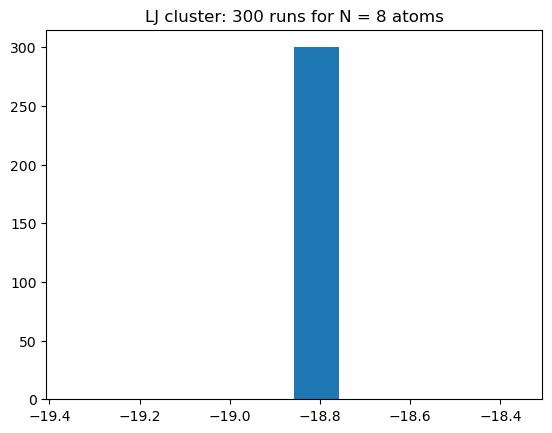

global minimum energy: -18.856826167718584   time: 290.1040024757385 sec


In [5]:
#N=8; ground state energy = -19.821489 eV

#pos_check = get_pos_from_url(N=8)
pos = init_pos(8)
N = 8
N_attempts = 300
time1 = time.time()
energy_val, pos_val = optim_energy(N, pos, resmethod='BFGS')
time2 = time.time()
dTime = time2 - time1

plt.title('LJ cluster: ' + str(N_attempts) + ' runs for N = ' + str(N) +' atoms')
plt.hist(energy_val)
plt.show()
print('global minimum energy:', min(energy_val), '  time:', dTime, 'sec')

data below is for N = 8 atoms

---timed trials using given ground state positions from the link---
- trial 1: google colab says this took 13 min with CG method, -19.8215 eV
- trial 2: L-BFGS-B method, -19.8215 eV, 11.99 sec
- trial 3: powell method, -19.8215 eV, 42.81 sec
- trial 4: BFGS method, -19.8215 eV, 51.88 sec

---timed trials using random positions (11/9 correction)---
- trial 1: CG method, -19.7653 eV, 1499.57 sec [about 25 minutes]
- trial 2: L-BFGS-B method, -17.7875 eV, 706.60 sec [about 12 minutes]
- trial 3: powell method, -18.7769 eV, 751.12 sec [about 12.5 minutes]
- trial 4: BFGS method, -19.8215 eV, 294.37 sec [about 5 minutes]
- trial 5: nelder-mead method, -9.8773 eV, 353.26 sec [about 6 minutes]

 Step: 299 out of 300; values: -27.5452

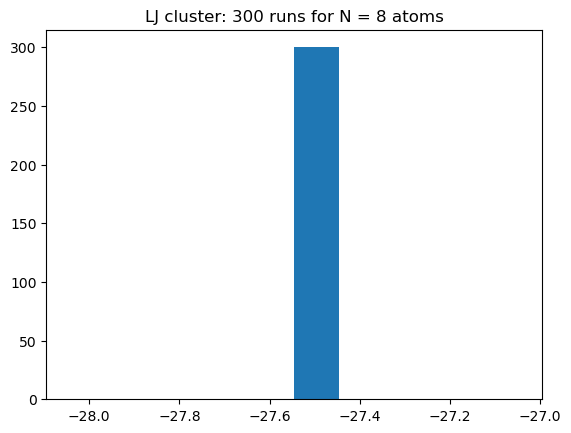

global minimum energy: -27.54520685229971   time: 439.2912337779999 sec


In [6]:
#N=10; ground state energy = -28.422532 eV

#pos_check = get_pos_from_url(N=10)
pos = init_pos(10)
N = 8
N_attempts = 300
time1 = time.time()
energy_val, pos_val = optim_energy(N, pos, resmethod='BFGS')
time2 = time.time()
dTime = time2 - time1

plt.title('LJ cluster: ' + str(N_attempts) + ' runs for N = ' + str(N) +' atoms')
plt.hist(energy_val)
plt.show()
print('global minimum energy:', min(energy_val), '  time:', dTime, 'sec')

#pos_check gives us -28.4225 eV @ 8.82 sec

 Step: 299 out of 300; values: -39.4689

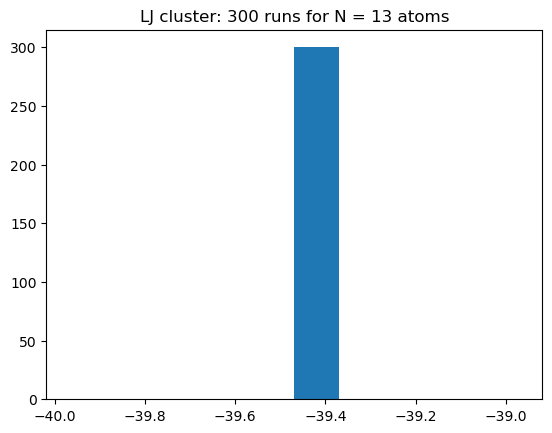

global minimum energy: -39.46888241526159   time: 2963.040876150131 sec


In [7]:
#N=13; ground state energy = -44.326801 eV

#pos_check = get_pos_from_url(N=13)
pos = init_pos(13)
N = 13
N_attempts = 300
time1 = time.time()
energy_val, pos_val = optim_energy(N, pos, resmethod='BFGS')
time2 = time.time()
dTime = time2 - time1

plt.title('LJ cluster: ' + str(N_attempts) + ' runs for N = ' + str(N) +' atoms')
plt.hist(energy_val)
plt.show()
print('global minimum energy:', min(energy_val), '  time:', dTime, 'sec')

#pos_check gives us -44.3268 eV @ 57.01 sec

11/9 homework corrections:
- change pos back to random and not the actual positions from the link
- in optim_energy func, define pos and method in the initial func line when defining variables